# Part 1

## (a)

In [1]:
addpath('helper_func/');

In [2]:
%%file helper_func/load_and_resize.m
function img = load_and_resize(imgpath, name, sz, print)
    addpath(imgpath);
    img = im2double(imread(strcat(name, '.jpg')));
    img = imresize(img, [sz, sz]);
    
    if print
        imshow(img);
    end
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\load_and_resize.m'.


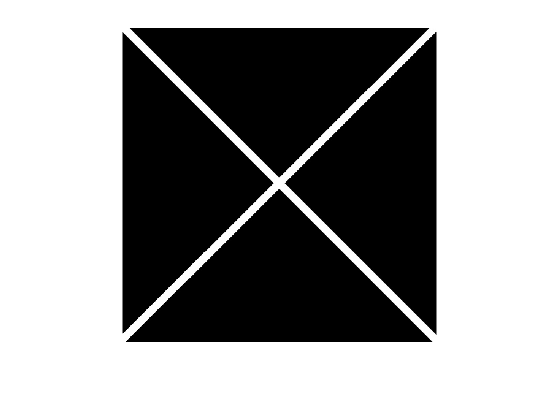

In [90]:
% part1 step a

part1_imgpath = '/';
filename = 'Cross';
step1img = load_and_resize(part1_imgpath, filename, 512, true);

In [12]:
%%file helper_func/part1bstep2.m
function step2 = part1bstep2(sz2, print)
    y = meshgrid(1:sz2(1), 1:sz2(2));
    x = y';

    step2 = sin(0.2 .* x) + sin(0.3 .* x) + cos(0.4 .* x) + ...
        sin(sqrt(x .* x + y .* y) .* 0.15) + sin(sqrt(x .* x + y .* y) .* 0.35);
    
    if print
        imshow(step2);
    end
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\part1bstep2.m'.


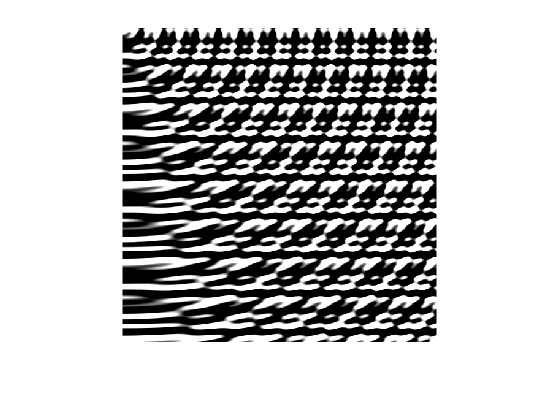

In [14]:
step2 = part1bstep2(size(img), true);

In [97]:
%%file helper_func/part1bstep3.m
function [magnitude, phase] = part1bstep3(I)
    imgF = fft2(I);
    
    magnitude = abs(fftshift(imgF));
    
    f = figure;
    a = subplot(1, 2, 1);
    imshow(magnitude,[]);;
    title("magnitude of DFT");
    colormap('gray'); drawnow;
    
    a = subplot(1, 2, 2);
    copyF = imgF;
    copyF(magnitude<1e-6) = 0;
    phase = unwrap(fftshift(angle(copyF))); 
    imshow(phase, []);
    title("phase of DFT");
    colormap('gray'); drawnow;
    
    step3 = 0;
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\part1bstep3.m'.


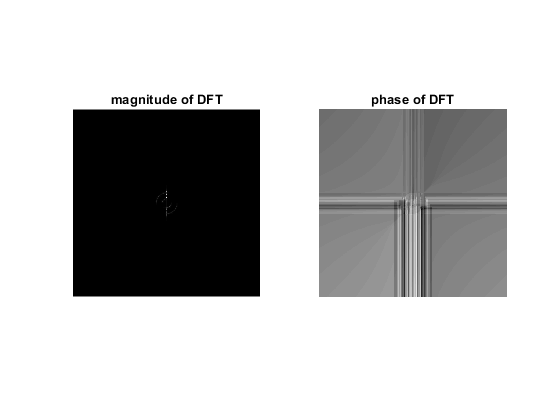

In [99]:
% step3
[step3M, step3P] = part1bstep3(step2);

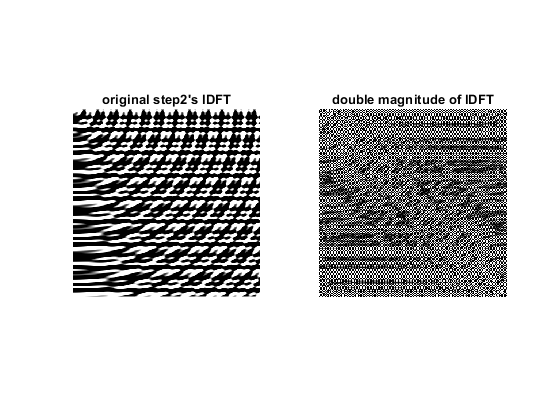

In [80]:
%step4 
origF = fft2(step2);
invF = real(ifft2(origF));

f = figure;
a= subplot(1, 2, 1);
imshow(invF);
title("original step2's IDFT");

step4_2M = step3M *2;
step4 = real(ifft2(step4_2M));
a= subplot(1, 2, 2);
imshow(step4);
title("double magnitude of IDFT");

In [ ]:
invImg = ifft2(mag .* 2);
imshow(invImg);

The image shows a mirrored wave at the symmetric side of the original picture.

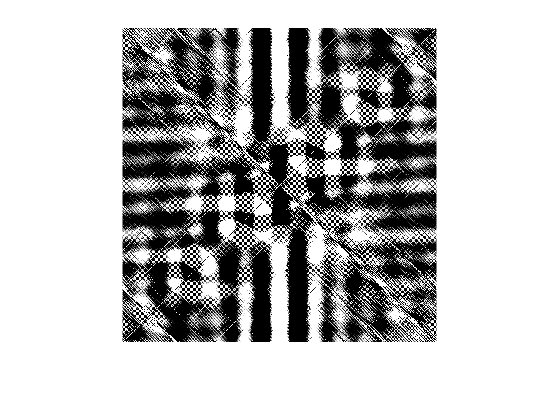

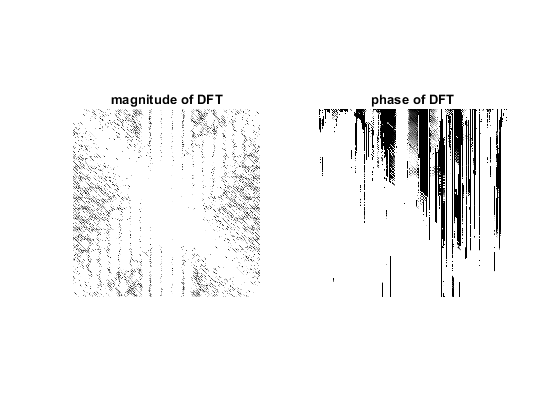

In [100]:
[part1bM, part1bP] = part1bstep3(step1img);

f = figure;
imshow(fftshift(real(fft2(step1img))));

Contains complex element, need discuss